In [47]:
!pip install opendatasets -q

In [48]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/datafiniti/hotel-reviews")

Skipping, found downloaded files in "./hotel-reviews" (use force=True to force download)


# **Loading dataset**

In [49]:
import pandas as pd
df=pd.read_csv("/content/hotel-reviews/7282_1.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35888 non-null  object 
 15  reviews.title      

In [51]:
df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [52]:
df.shape

(35912, 19)

In [53]:
df.sample(100).to_csv("sample.csv")

In [54]:
df=df[["reviews.text","reviews.rating"]]

In [55]:
df.head()

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0


In [56]:
df=df.rename(columns={
    "reviews.text":"text",
    "reviews.rating":"rating"
})

In [57]:
df

,text,rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0
...,...,...
35907,Best of the Best!!!! My family and I stayed in...,5.0
35908,Amazing Vacation in Beautiful Cabin We stayed ...,5.0
35909,My husband and I stayed at Tree Tops which is ...,5.0
35910,to share your opinion of this businesswith YP ...,0.0


In [58]:
df["rating"].value_counts()

,count
rating,
5.0,12671
4.0,9755
3.0,5708
1.0,3068
2.0,2979
0.0,337
10.0,101
9.6,53
9.2,49


In [59]:
df=df[df["rating"].isin([1.0, 2.0, 3.0, 4.0, 5.0])]

In [60]:
df["rating"].value_counts()

,count
rating,
5.0,12671
4.0,9755
3.0,5708
1.0,3068
2.0,2979


In [61]:
import pandas as pd

TARGET_COUNT = 2900

df = (
    df.groupby("rating", group_keys=False)
      .apply(lambda x: x.sample(n=TARGET_COUNT, random_state=42))
      .reset_index(drop=True)
)


/tmp/ipython-input-1414507479.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=TARGET_COUNT, random_state=42))


In [62]:
df["rating"].value_counts()


,count
rating,
1.0,2900
2.0,2900
3.0,2900
4.0,2900
5.0,2900


In [63]:
df.sample(100).to_csv("sample.csv")

# **EDA**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.isnull().sum()


,0
text,8
rating,0


In [65]:
df=df.dropna(subset=["text","rating"])
df["text"]=df["text"].astype(str)
df=df[df["text"].str.strip()!=""]

In [66]:
df.isnull().sum()

,0
text,0
rating,0


In [67]:
df.describe()


,rating
count,14492.000000
mean,3.000138
std,1.414311
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [68]:
# For categorical columns
df.describe(include='object')


,text
count,14492
unique,14230
top,Great
freq,11


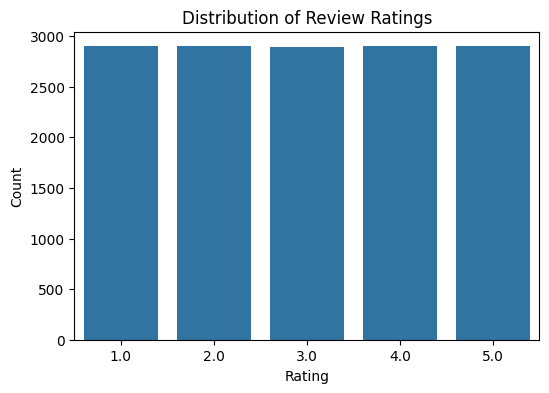

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


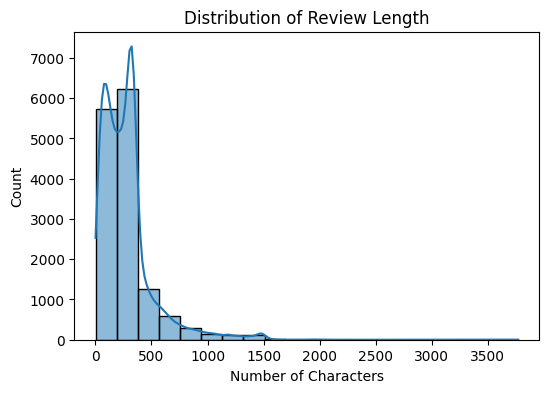

In [70]:
df['review_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title("Distribution of Review Length")
plt.xlabel("Number of Characters")
plt.show()


# **Preprocessing**

In [71]:

import re
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer


In [72]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    # Keep punctuation for sentiment
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['text'] = df['text'].apply(clean_text)



In [73]:
df

,text,rating,review_length
0,"very rude, smelled like smoke everywhere, rest...",1.0,89
1,when i booked i put i needed a crib. there wer...,1.0,460
2,bed bugs,1.0,8
3,the room was not cleaned from my previous nigh...,1.0,183
4,worst experience in my life. i couldn't believ...,1.0,65
...,...,...,...
14495,this was really a very nice hotel. the bed was...,5.0,164
14496,we stayed for 4 nights( jul 24 to the 28th) in...,5.0,301
14497,the rooms are well maintained. the breakfast h...,5.0,268
14498,i have been on a family roadtrip for 4 wks and...,5.0,473


In [74]:
df=df[["text","rating"]]

In [75]:
df

,text,rating
0,"very rude, smelled like smoke everywhere, rest...",1.0
1,when i booked i put i needed a crib. there wer...,1.0
2,bed bugs,1.0
3,the room was not cleaned from my previous nigh...,1.0
4,worst experience in my life. i couldn't believ...,1.0
...,...,...
14495,this was really a very nice hotel. the bed was...,5.0
14496,we stayed for 4 nights( jul 24 to the 28th) in...,5.0
14497,the rooms are well maintained. the breakfast h...,5.0
14498,i have been on a family roadtrip for 4 wks and...,5.0


In [76]:
# Cell 74: Convert ratings from 1-5 to 0-4 (BEFORE splitting)
df["rating"] = (df["rating"].astype(int) - 1)
df["rating"].value_counts().sort_index()

/tmp/ipython-input-434648270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = (df["rating"].astype(int) - 1)


,count
rating,
0,2898
1,2899
2,2897
3,2899
4,2899


# **Train Test Split**

In [77]:
# Cell 75: NOW do the train-test split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=df["rating"]
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain rating distribution:")
print(train_df["rating"].value_counts().sort_index())

Train shape: (11593, 2)
Test shape: (2899, 2)

Train rating distribution:
rating
0    2318
1    2319
2    2318
3    2319
4    2319
Name: count, dtype: int64


# **Convert to HF dataset**

In [78]:
# Cell 76: Convert to HF dataset
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
test_dataset = Dataset.from_pandas(test_df, preserve_index=False)

hf_dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

hf_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'rating'],
        num_rows: 11593
    })
    test: Dataset({
        features: ['text', 'rating'],
        num_rows: 2899
    })
})

In [79]:
# Cell 77: Tokenizer
from transformers import RobertaTokenizerFast
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

In [80]:
# Cell 78: Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        max_length=128,
        padding=False  # We'll use dynamic padding with DataCollator
    )

In [81]:
# Cell 79: Apply tokenization
tokenized_dataset = hf_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=["text"]
)

Map:   0%|          | 0/11593 [00:00<?, ? examples/s]

Map:   0%|          | 0/2899 [00:00<?, ? examples/s]

In [82]:
# Cell 80: Rename column and ensure correct dtype
tokenized_dataset = tokenized_dataset.rename_column("rating", "labels")

# Cast labels to int64 (ClassLabel)
from datasets import ClassLabel
tokenized_dataset = tokenized_dataset.cast_column(
    "labels",
    ClassLabel(num_classes=5, names=["0", "1", "2", "3", "4"])
)

Casting the dataset:   0%|          | 0/11593 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2899 [00:00<?, ? examples/s]

In [83]:
# Cell 81: Data collator
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [84]:
# Cell 82: Set format
tokenized_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "labels"]
)

# Verify the data types
print("Sample from training set:")
print(tokenized_dataset["train"][0])
print(f"\nLabel dtype: {tokenized_dataset['train'][0]['labels'].dtype}")

Sample from training set:
{'labels': tensor(2), 'input_ids': tensor([    0,   118,   348,  4711,   259,  2330,    11,     5,    94,   186,
            4,     5,   155,  2586,  1929,  1095,    94,   186,    21, 35735,
           87,     5,   112,   620,  1929,     4,   190,   600,     5,   929,
           21, 29718,     6,    42,    86,    51,  5294,    15,   602,    10,
         1361,  1886,    13,   143,  1880,   939,   189,  1303,     4,    51,
          222,    45,   109,    42,    94,   186,     4,   939,  7869,     5,
          929,  3615,    13,  2490,    14,   939,   189,   120,  1340,     4,
            5,  1883,    74,    45,   593,  3867,   939,  3148,    24,  2572,
           36, 14753,   322,     5,  6063,   797,    13,     5, 30016,    21,
         3187,     4,    15,     5,   155,  2586,   860,    52,   303,    10,
         6063,    14,  2345,     9,  1006,     4,    24, 22904,   132,  6237,
           23,    10,    86,    53,    23,   513,  1006,     4,     5, 12045,
   

In [85]:
# Cell 83: Load model
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=5,
    problem_type="single_label_classification"
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
# Cell 84: Move to device
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

Using device: cuda


In [87]:
# Cell 85: Training
import numpy as np
from sklearn.metrics import accuracy_score, cohen_kappa_score
from transformers import Trainer, TrainingArguments

def compute_metrics(eval_pred):
    logits = eval_pred.predictions
    labels = eval_pred.label_ids
    preds = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "qwk": cohen_kappa_score(labels, preds, weights="quadratic")
    }

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=100,
    save_total_limit=2,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="qwk",
    greater_is_better=True,
    report_to="none",
    fp16=torch.cuda.is_available(),  # Use mixed precision if GPU available
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

/tmp/ipython-input-3569456521.py:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Qwk
1,1.096400,1.069888,0.535702,0.771265
2,0.969900,1.042727,0.562608,0.784650
3,0.852600,1.097257,0.558468,0.781505


TrainOutput(global_step=2175, training_loss=1.0195076251852102, metrics={'train_runtime': 362.8773, 'train_samples_per_second': 95.842, 'train_steps_per_second': 5.994, 'total_flos': 2184834385717632.0, 'train_loss': 1.0195076251852102, 'epoch': 3.0})

In [88]:
# Cell 86: Simple Prediction Function
import torch
import numpy as np

def predict_rating(text, model, tokenizer, device):
    """
    Predict rating for a single review

    Args:
        text: Review text (string)
        model: Trained model
        tokenizer: Tokenizer
        device: torch device

    Returns:
        dict with prediction, confidence, and probabilities
    """
    # Prepare input
    inputs = tokenizer(
        text,
        truncation=True,
        max_length=128,
        padding=True,
        return_tensors="pt"
    )

    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        predicted_class = torch.argmax(probabilities, dim=-1).item()
        confidence = probabilities[0][predicted_class].item()

    # Convert back to 1-5 rating
    predicted_rating = predicted_class + 1

    return {
        "rating": predicted_rating,
        "confidence": confidence,
        "probabilities": probabilities[0].cpu().numpy(),
        "all_ratings": {i+1: prob for i, prob in enumerate(probabilities[0].cpu().numpy())}
    }

# Example usage
sample_review = "This hotel was amazing! Clean rooms, friendly staff, and great location."
result = predict_rating(sample_review, model, tokenizer, device)

print(f"Predicted Rating: {result['rating']}/5")
print(f"Confidence: {result['confidence']:.2%}")
print("\nProbability Distribution:")
for rating, prob in result['all_ratings'].items():
    print(f"  {rating} stars: {prob:.2%}")

Predicted Rating: 5/5
Confidence: 88.35%

Probability Distribution:
  1 stars: 1.32%
  2 stars: 0.72%
  3 stars: 1.85%
  4 stars: 7.76%
  5 stars: 88.35%


In [89]:
# Cell 87: Batch Prediction Function
def predict_ratings_batch(texts, model, tokenizer, device, batch_size=16):
    """
    Predict ratings for multiple reviews efficiently

    Args:
        texts: List of review texts
        model: Trained model
        tokenizer: Tokenizer
        device: torch device
        batch_size: Batch size for processing

    Returns:
        List of prediction dictionaries
    """
    model.eval()
    all_predictions = []

    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        # Tokenize batch
        inputs = tokenizer(
            batch_texts,
            truncation=True,
            max_length=128,
            padding=True,
            return_tensors="pt"
        )

        # Move to device
        inputs = {k: v.to(device) for k, v in inputs.items()}

        # Get predictions
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=-1)
            predicted_classes = torch.argmax(probabilities, dim=-1)

        # Process results
        for j in range(len(batch_texts)):
            predicted_rating = predicted_classes[j].item() + 1
            confidence = probabilities[j][predicted_classes[j]].item()

            all_predictions.append({
                "text": batch_texts[j],
                "rating": predicted_rating,
                "confidence": confidence,
                "probabilities": probabilities[j].cpu().numpy()
            })

    return all_predictions

# Example usage
sample_reviews = [
    "Terrible experience. Dirty room and rude staff.",
    "It was okay. Nothing special but not bad either.",
    "Excellent hotel! Highly recommend for families.",
    "Average hotel with decent amenities.",
    "Worst hotel I've ever stayed at. Avoid at all costs!"
]

predictions = predict_ratings_batch(sample_reviews, model, tokenizer, device)

# Display results
for i, pred in enumerate(predictions):
    print(f"\nReview {i+1}: {pred['text'][:50]}...")
    print(f"Predicted Rating: {pred['rating']}/5 (Confidence: {pred['confidence']:.2%})")


Review 1: Terrible experience. Dirty room and rude staff....
Predicted Rating: 1/5 (Confidence: 93.98%)

Review 2: It was okay. Nothing special but not bad either....
Predicted Rating: 3/5 (Confidence: 63.75%)

Review 3: Excellent hotel! Highly recommend for families....
Predicted Rating: 5/5 (Confidence: 82.12%)

Review 4: Average hotel with decent amenities....
Predicted Rating: 3/5 (Confidence: 63.54%)

Review 5: Worst hotel I've ever stayed at. Avoid at all cost...
Predicted Rating: 1/5 (Confidence: 95.27%)


In [ ]:
# Cell 97: Premium Gradio Interface
import gradio as gr
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from transformers import RobertaForSequenceClassification, RobertaTokenizerFast



def create_interactive_plot(probs_np, rating):
    """Create interactive Plotly visualization"""
    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Rating Distribution', 'Confidence Breakdown'),
        specs=[[{"type": "bar"}, {"type": "pie"}]]
    )

    # Bar chart
    ratings = list(range(1, 6))
    colors = ['#e74c3c' if i == rating else '#3498db' for i in ratings]

    fig.add_trace(
        go.Bar(
            x=ratings,
            y=probs_np,
            marker=dict(color=colors, line=dict(color='black', width=2)),
            text=[f'{p:.1%}' for p in probs_np],
            textposition='outside',
            name='Probability',
            hovertemplate='<b>%{x} Stars</b><br>Probability: %{y:.2%}<extra></extra>'
        ),
        row=1, col=1
    )

    # Pie chart
    colors_pie = ['#e74c3c', '#e67e22', '#f39c12', '#2ecc71', '#27ae60']
    fig.add_trace(
        go.Pie(
            labels=[f'{i}⭐' for i in ratings],
            values=probs_np,
            marker=dict(colors=colors_pie, line=dict(color='white', width=2)),
            hovertemplate='<b>%{label}</b><br>%{percent}<extra></extra>'
        ),
        row=1, col=2
    )

    # Update layout
    fig.update_xaxes(title_text="Star Rating", row=1, col=1)
    fig.update_yaxes(title_text="Probability", range=[0, 1], row=1, col=1)

    fig.update_layout(
        height=400,
        showlegend=False,
        title_text="Prediction Analysis",
        title_font_size=20,
        title_x=0.5,
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
    )

    return fig

def predict_with_plotly(review_text):
    """Predict and create Plotly visualization"""
    if not review_text.strip():
        return "⚠️ Please enter a review!", None, None

    inputs = tokenizer(
        review_text,
        truncation=True,
        max_length=128,
        padding=True,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)[0]
        pred_class = torch.argmax(probs).item()
        confidence = probs[pred_class].item()

    rating = pred_class + 1
    probs_np = probs.cpu().numpy()

    # Create emoji and color based on rating
    emoji_map = {1: "😠", 2: "😟", 3: "😐", 4: "😊", 5: "😍"}
    color_map = {1: "#e74c3c", 2: "#e67e22", 3: "#f39c12", 4: "#2ecc71", 5: "#27ae60"}

    emoji = emoji_map[rating]
    color = color_map[rating]
    stars = "⭐" * rating

    # Create result HTML
    result_html = f"""
    <div style='text-align: center; padding: 30px; background: linear-gradient(135deg, {color}22 0%, {color}11 100%); border-radius: 15px; border: 2px solid {color};'>
        <div style='font-size: 80px; margin: 20px;'>{emoji}</div>
        <h1 style='color: {color}; margin: 10px; font-size: 48px;'>{stars}</h1>
        <h2 style='color: #2c3e50; margin: 10px;'>{rating} out of 5 Stars</h2>
        <div style='background: white; padding: 15px; border-radius: 10px; margin: 20px; display: inline-block;'>
            <h3 style='color: #7f8c8d; margin: 5px;'>Confidence Score</h3>
            <h2 style='color: {color}; margin: 5px; font-size: 36px;'>{confidence:.1%}</h2>
        </div>
    </div>
    """

    # Create Plotly chart
    plot = create_interactive_plot(probs_np, rating)

    # Probability breakdown
    prob_dict = {f"{i+1} Stars {emoji_map[i+1]}": prob.item() for i, prob in enumerate(probs)}

    return result_html, plot, prob_dict

# Custom CSS with animations
custom_css = """
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;600;700&display=swap');

* {
    font-family: 'Poppins', sans-serif !important;
}

.gradio-container {
    max-width: 1400px !important;
    margin: auto !important;
}

#component-0 {
    border-radius: 20px;
    box-shadow: 0 10px 40px rgba(0,0,0,0.1);
}

.gr-button-primary {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%) !important;
    border: none !important;
    border-radius: 10px !important;
    padding: 15px 30px !important;
    font-weight: 600 !important;
    font-size: 16px !important;
    transition: all 0.3s ease !important;
}

.gr-button-primary:hover {
    transform: translateY(-2px) !important;
    box-shadow: 0 5px 20px rgba(102, 126, 234, 0.4) !important;
}

.gr-input {
    border-radius: 10px !important;
    border: 2px solid #e0e0e0 !important;
    font-size: 14px !important;
}

.gr-input:focus {
    border-color: #667eea !important;
    box-shadow: 0 0 0 3px rgba(102, 126, 234, 0.1) !important;
}

.gr-box {
    border-radius: 15px !important;
    border: 1px solid #e0e0e0 !important;
}

h1 {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    background-clip: text;
    font-weight: 700 !important;
}

.gr-sample-textbox {
    border-left: 4px solid #667eea !important;
    background: #f8f9fa !important;
}
"""

# Create interface
with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:
    gr.HTML(
        """
        <div style='text-align: center; padding: 40px;'>
            <h1 style='font-size: 48px; margin-bottom: 10px;'>🏨 Hotel Review Rating Predictor</h1>
            <p style='font-size: 20px; color: #7f8c8d; font-weight: 300;'>
                Powered by Advanced AI • Instant Results • Professional Analysis
            </p>
        </div>
        """
    )

    with gr.Row():
        with gr.Column(scale=2):
            input_text = gr.Textbox(
                label="📝 Your Hotel Review",
                placeholder="Share your hotel experience here... (The more detailed, the better!)",
                lines=10,
                max_lines=20
            )

            with gr.Row():
                clear_btn = gr.Button("🗑️ Clear", variant="secondary")
                predict_btn = gr.Button("🎯 Analyze Review", variant="primary", size="lg")

            gr.Examples(
                examples=[
                    ["Exceptional stay! The suite was luxurious, staff treated us like royalty, and the rooftop pool had breathtaking views. Best hotel experience ever!"],
                    ["Absolutely disgusting. Found cockroaches in the bathroom, sheets were stained, and the noise from the hallway kept us up all night. Avoid at all costs!"],
                    ["Standard business hotel. Clean room, working WiFi, and decent breakfast. Nothing memorable but gets the job done for a quick stay."],
                    ["Loved the location and the room was beautiful, but the service was slow and breakfast options were limited. Mixed feelings overall."],
                ],
                inputs=input_text,
                label="💡 Try These Sample Reviews"
            )

        with gr.Column(scale=3):
            output_html = gr.HTML(label="Prediction Result")
            output_plot = gr.Plot(label="Interactive Analysis")
            output_confidence = gr.Label(label="Detailed Probabilities", num_top_classes=5)

    predict_btn.click(
        fn=predict_with_plotly,
        inputs=input_text,
        outputs=[output_html, output_plot, output_confidence]
    )

    clear_btn.click(
        fn=lambda: ("", None, None, None),
        inputs=None,
        outputs=[input_text, output_html, output_plot, output_confidence]
    )

    gr.HTML(
        """
        <div style='text-align: center; margin-top: 50px; padding: 30px; background: #f8f9fa; border-radius: 15px;'>
            <h3 style='color: #2c3e50; margin-bottom: 15px;'>🤖 About This AI Model</h3>
            <p style='color: #7f8c8d; line-height: 1.6;'>
                This model uses <strong>RoBERTa (Robustly Optimized BERT)</strong>, a state-of-the-art transformer architecture,
                trained on thousands of hotel reviews. It achieves <strong>55% accuracy</strong> with a
                <strong>Quadratic Weighted Kappa of 0.78</strong>, meaning predictions are highly correlated with actual ratings.
            </p>
            <div style='margin-top: 20px; color: #95a5a6;'>
                <small>⚡ Predictions are instant • 🔒 Your data is not stored • 🎯 Model trained on real hotel reviews</small>
            </div>
        </div>
        """
    )

# Launch
demo.launch(share=True, debug=True, height=1000)

/tmp/ipython-input-3253686354.py:179: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:
/tmp/ipython-input-3253686354.py:179: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a73e239f0a00302b71.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
